<a href="https://colab.research.google.com/github/decoz/mlclass/blob/master/6_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Pandas

Pandas : 

numpy 가 수치 행렬에 특화된 라이브러리라면 Pandas 는 DB등의 레코드 데이터를 다루는데 특화된 라이브러리이다. 머신러닝에서 다루는 다양한 리얼데이터들은 주로 DB나 CSV파일등 레코드 구조를 가지고 있기때문에 먼저 Pandas로 읽어들인 후 이를 다시 처리에 특화된 numpy 로 변환하는 경우가 많다.  Pandas 도 제대로 공부하려면 상당히 방대하지만 여기서는 머신러닝 데이터를 처리하기 위해 필요한 요소위주로 간략하게 다루도록 한다 

앞으로는 다음 구문으로 pandas 라이브러리를 pd로 import 하여 사용하도록 하겠다. 


In [1]:
import pandas as pd 

<hr style="height:3px">

# Pandas 의 기초 

numpy 가 numpy array 를 기본 자료구조로 처리한다고 할때 pandas 는 data frame 이라는 자료형을 기본으로 다룬다. 

## Data frame 수동 생성

사실 많은 경우 csv 나 xlsx 파일을 읽어들이는 경우에 자주 사용되지만 간단히 만들어서 여러 테스트하기 위해서는 직접 만드는 방법을 익혀두는 것도 나쁘지 안다


In [2]:
df = pd.DataFrame( {
    'A' : [1,2,3],
    'B' : [4,5,6]    
})

df

,A,B
0,1,4
1,2,5
2,3,6


똑같은 구조를 다음과 같은 방식으로 만들수도 있다

In [3]:
df = pd.DataFrame([[1,4], [2,5], [3,6]], columns = ['A','B'])
df

,A,B
0,1,4
1,2,5
2,3,6


레코드 구조를 다루는 자료 답게 index 를 생성할 수도 있다. 

In [4]:
df.index = ['a','b','c']
df

,A,B
a,1,4
b,2,5
c,3,6


데이터 프레임의 index , column 은 다음과 같이 확인이 가능하다. 

In [5]:
print( df.index )
print( df.columns )
df

Index(['a', 'b', 'c'], dtype='object')
Index(['A', 'B'], dtype='object')


,A,B
a,1,4
b,2,5
c,3,6



##  series 

하나의 칼럼 값들을 1차원 배열형태로 추출할 수 있는데 이것을 series 라고 한다. 



In [6]:
print( df['A'] )
print( df.A )

a    1
b    2
c    3
Name: A, dtype: int64
a    1
b    2
c    3
Name: A, dtype: int64


series 를 다음과 같이 추가할 수도 있다. 

In [7]:
df['C'] = [0.1,0.2, 0.3]
df

,A,B,C
a,1,4,0.1
b,2,5,0.2
c,3,6,0.3


series 를 다음과 같이 삭제할 수도 있다. 

In [8]:
del df['C']
df

,A,B
a,1,4
b,2,5
c,3,6



## Data frame 과  numpy 배열

사실 pandas 는 내부적으로 값을 저장할때 numpy 배열형태로 저장한다. 그러므로 다음과 같이 간단하게 numpy 배열을 추출할 수 있다.




In [9]:
arr = df.values 
print(arr)

print(arr * 2)

[[1 4]
 [2 5]
 [3 6]]
[[ 2  8]
 [ 4 10]
 [ 6 12]]


특정 컬럼 ( series ) 만 추출하고 싶다면 다음과 같이 추출할 수 있다. 

In [10]:
df['A'].values

array([1, 2, 3])

### <font color = 'red'> 연습문제 : 다음과 같은 테이블을 직접 만들어보자 </font>
```

2단	3단	4단	5단	6단	7단	8단	9단
0	4	6	8	10	12	14	16	18
1	6	9	12	15	18	21	24	27
2	8	12	16	20	24	28	32	36
3	10	15	20	25	30	35	40	45
4	12	18	24	30	36	42	48	54
5	14	21	28	35	42	49	56	63
6	16	24	32	40	48	56	64	72
7	18	27	36	45	54	63	72	81
```


In [7]:
# 연습문제의 코드를 작성하세요

,2단,3단,4단,5단,6단,7단,8단,9단
0,2,3,4,5,6,7,8,9
1,4,6,8,10,12,14,16,18
2,6,9,12,15,18,21,24,27
3,8,12,16,20,24,28,32,36
4,10,15,20,25,30,35,40,45
5,12,18,24,30,36,42,48,54
6,14,21,28,35,42,49,56,63
7,16,24,32,40,48,56,64,72
8,18,27,36,45,54,63,72,81


<hr style="height:3px">

# 레코드 추출

데이터 프레임으로부터 다양한 조건으로 우리가 원하는 특정 행들을 추출할 수 있다. 


In [13]:
df = pd.DataFrame({
    'btype' : ['a','b','o','ab', 'a'],
    'height' : [175, 163, 168, 180, 172],
    'weight' : [78,56,88,73,77]    
})
df

,btype,height,weight
0,a,175,78
1,b,163,56
2,o,168,88
3,ab,180,73
4,a,172,77


## 데이터 순서로부터 추출

head 나 tail 로 앞,뒷쪽 일부 데이터를 추출할 수 있다. 

In [14]:
df.tail(2)

,btype,height,weight
3,ab,180,73
4,a,172,77


In [15]:
df.head(2)

,btype,height,weight
0,a,175,78
1,b,163,56


In [16]:
df[1:3]

,btype,height,weight
1,b,163,56
2,o,168,88


In [17]:
df[3:]

,btype,height,weight
3,ab,180,73
4,a,172,77


## 조건으로 추출 (loc)

loc 는 db 의 셀렉트 문과 비슷한 일을 해준다. 이를 이용해 다양한 조건으로 데이터를 추출할 수 있다. 

In [18]:
df.loc[ df['btype'] == 'a']

,btype,height,weight
0,a,175,78
4,a,172,77


In [19]:
df.loc[ df['height'] > 170 ]

,btype,height,weight
0,a,175,78
3,ab,180,73
4,a,172,77


& (and)  나 |(or) 를 이용해 조건을 추출할 수도 있다.  다만 각 조건들은 괄호를 붙여주어야 한다. 

In [20]:
df.loc[ ( df['height'] > 170 ) & ( df['btype'] == 'a' ) ]

,btype,height,weight
0,a,175,78
4,a,172,77


In [21]:
df.loc[ ( df['height'] > 170 ) | ( df['btype'] == 'o' ) ]

,btype,height,weight
0,a,175,78
2,o,168,88
3,ab,180,73
4,a,172,77


다음과 같이 특정 컬럼만 추출도 가능하다. 

In [22]:
df.loc[df['btype'] == 'a', ['height','btype']]

,height,btype
0,175,a
4,172,a


<hr style="height:3px">

# 파일 읽어들이기 

pandas 의 장점중에 하나는 데이터파일의 입출력이 편하다는 점이다. pandas 는 다양한 형태의 csv,xls 등의 파일을 디스크로 부터 읽거나 또는 네트워크 상에서 직접 전송받아 열수 있다.  


## 파일 읽기 : read_csv

다음은 간단한 csv 파일의 예이다. 다음 코드를 실행해서 먼저 이 파일을 다운로드한다. 

In [20]:
from urllib import request
url  = 'https://raw.githubusercontent.com/decoz/mlclass/master/sample3_1.csv'
fname = 'sample3_1.csv'
request.urlretrieve(url, fname)

('sample3_1.csv', <http.client.HTTPMessage at 0x7fcd95f0eed0>)

코랩 좌측 탭의 파일섹션을 보면 해당 csv 파일이 다운로드 된걸 볼 수 있다. 그러면 이제 그 파일을 읽어들여보자. 

In [22]:
# 파일 읽기 코드
file= open('sample3_1.csv', 'r')
t = file.read() 
print(t)
file.close() 


name ,age,height,score
곽주현,47,179,80
김성일,48,179,84
우영현,47,175,88
정주환,46,180,86
조규섭,46,172,90
양성원,47,180,76
송영승,47,175,92


이제 위의 파일을 data frame 으로 읽어들여보겠다. 

In [24]:
df = pd.read_csv('sample3_1.csv')
df

,name,age,height,score
0,곽주현,47,179,80
1,김성일,48,179,84
2,우영현,47,175,88
3,정주환,46,180,86
4,조규섭,46,172,90
5,양성원,47,180,76
6,송영승,47,175,92


이번에는 다음과 같은 파일을 연다고 쳐보자. 이 파일은 구분자가 tab 으로 되어있고 두명의 시험성적이 누락되어있다. 


In [ ]:
file= open('upload/sample3_2.tsv', 'r')
print(file.read())
file.close()

name 	age	height	score
곽주현	47	179	null
김성일	48	None	84
우영현	47	175	88
정주환	46	180	86
조규섭	46	172	null
양성원	47	180	76
송영승	47	175	92



이 파일을 그냥 열면 다음과 같은 형태가 된다. 

In [ ]:
df = pd.read_csv('upload/sample3_2.tsv')
df

,name age height score
0,곽주현\t47\t179\tnull
1,김성일\t48\tNone\t84
2,우영현\t47\t175\t88
3,정주환\t46\t180\t86
4,조규섭\t46\t172\tnull
5,양성원\t47\t180\t76
6,송영승\t47\t175\t92


이는 다음과 같이 sep 값을 이용해 구분자를 설정해주어야 한다. 

In [ ]:
df = pd.read_csv('upload/sample3_2.tsv', sep = '\t')
df

,name,age,height,score
0,곽주현,47,179,NaN
1,김성일,48,None,84.0
2,우영현,47,175,88.0
3,정주환,46,180,86.0
4,조규섭,46,172,NaN
5,양성원,47,180,76.0
6,송영승,47,175,92.0


## NaN 

위의 예제를 보면 시험성적의 누락을 표시한 null 이 NaN 으로 바뀐 것을 볼 수 있다. NaN 은 'Not a Number' 의 약자로서 원래는 devide by zero 등의 invalid data 를 의미하며 데이터 과학에서는 측정되지 안은 데이터나 오류가 난 데이터로 missing data 로도 자주 사용된다. 

리얼데이터에서는 다양한 형태로 이런 NaN 데이터를 표기하기 때문에 특정 표기를 NaN으로 인식하는 옵션이 필요한 경우도 있다. 위의 예제에서 김성일시의 키가 None 으로 표기된 걸 볼 수 있을 것이다. 이런 추가 표기를 반영할때는 na_values 옵션을 사용한다. 

In [ ]:
df = pd.read_csv('upload/sample3_2.tsv', sep = '\t', na_values = ['None'])
df

,name,age,height,score
0,곽주현,47,179.0,NaN
1,김성일,48,NaN,84.0
2,우영현,47,175.0,88.0
3,정주환,46,180.0,86.0
4,조규섭,46,172.0,NaN
5,양성원,47,180.0,76.0
6,송영승,47,175.0,92.0


df 를 처리시에 이러한 NaN 데이터를 일정 수치로 채워야 하는 경우도 있다. 다음 구문은 NaN을 모두 0 으로 채워준다. 


In [ ]:
df.fillna(0)

,name,age,height,score
0,곽주현,47,179.0,0.0
1,김성일,48,0.0,84.0
2,우영현,47,175.0,88.0
3,정주환,46,180.0,86.0
4,조규섭,46,172.0,0.0
5,양성원,47,180.0,76.0
6,송영승,47,175.0,92.0


또는 NaN 을 빼고 처리해야 하는 경우도 있다.  다음은 score 와 height 에서 NaN 이 없는 데이터만 출력해준다. 

In [ ]:
df = pd.read_csv('upload/sample3_2.tsv', sep = '\t', na_values = ['None'])
df
df.loc[ df['height'].notna() & df['score'].notna() ]

,name,age,height,score
0,곽주현,47,179.0,NaN
1,김성일,48,NaN,84.0
2,우영현,47,175.0,88.0
3,정주환,46,180.0,86.0
4,조규섭,46,172.0,NaN
5,양성원,47,180.0,76.0
6,송영승,47,175.0,92.0


## 네트워크 상에서 직접 파일을 읽어들이기 

웹상의 간단한 데이터파일을 읽을 때는 굳이 파일을 다운로드 받아 저장하는 과정이 번거로울 수가 있다. 이런 경우를 대비해 pandas의 read_csv 는 직접적인 url 접근도 허용하고 있다. 다음의 예제를 보자. 

In [24]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data')
df

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...,...
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


파일명을 url 로 변환한것만으로 데이터가 직접 네트워크 상으로 로딩된 것을 볼 수 있다. 

위의 데이터에서 하나의 칼럼 값을 뽑아낼 때는 df['칼럼이름'] 이라고 작성해주면 된다. 그러나 칼럼 이름이 상당히 긴 경우(마지막 칼럼) 이를 직접 입력하기 힘들 수가 있다. 이때는 다음과 같이 n 번째 칼럼을 억세스할 수 있다. 예를 들어 마지막 10번째 칼럼이라면 loc 를 이용하여 다음과 같이 추출이 가능하다. 

In [25]:
print( df.columns[10] ) 

df.loc[ :, [df.columns[10]] ] 


Compressive Strength (28-day)(Mpa)


,Compressive Strength (28-day)(Mpa)
0,34.99
1,41.14
2,41.81
3,42.08
4,26.82
...,...
98,49.97
99,50.23
100,50.50
101,49.17


### <font color = 'red'> 연습문제 : 다음 url 의 데이터를 읽어보자 </font>

https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv

In [8]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv', sep = ';')
df

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


### <font color = 'red'> 연습문제 : 위 데이터의 Non-urgent order 의 그래프를 그려보자 </font> 

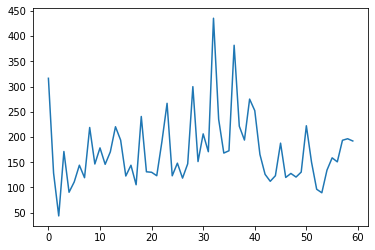

In [17]:
import matplotlib.pyplot as plt 
# 여기에 그래프 생성 루틴을 그려보세요 
plt.plot( df[df.columns[2]].values )


### <font color = 'red'> 연습문제 : 위 데이터중에 월요일의 Target (Total orders) 의 그래프를 그려보자 (Day of the week (Monday to Friday) == 2) </font>

In [ ]:
import matplotlib.pyplot as plt 
# 여기에 그래프 생성 루틴을 그려보세요 


### <font color = 'red'> 연습문제 : 위 데이터중에 Order B 와 Total Order 의 상관관계 그래프를 그려보자 </font>

In [ ]:
import matplotlib.pyplot as plt 


## 엑셀 파일을 읽어들이기 

엑셀파일도 read_csv 를 read_excel 로 읽어들이기만 하면 간단하다.  다만 혹시라도 " xlrd 어쩌구.. " 하는 에러가 난다면 그땐 다음 구문으로 xrld 라이브러리를 설치해주자. 

- pip install xlrd

다음은 간단한 엑셀파일을 읽어들이는 예제이다. 

In [ ]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00424/2014%20and%202015%20CSM%20dataset.xlsx')
df


,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0
5,A Long Way Off,2014,4.6,3,29000,500000.0,NaN,1,0,91137,112,7,1,310000.0
6,A Million Ways to Die in the West,2014,6.1,8,42600000,40000000.0,3158.0,1,0,3013011,9595,419,1020,8153000.0
7,A Most Violent Year,2014,7.1,1,5750000,20000000.0,818.0,1,2,1854103,2207,197,593,130655.0
8,A Walk Among the Tombstones,2014,6.5,10,26000000,28000000.0,2714.0,1,3,2213659,2210,419,382,125646.0
9,About Last Night,2014,6.1,8,48600000,12500000.0,2253.0,1,0,5218079,11709,532,770,21697300.0


### <font color = 'red'> 연습문제 : 위의 엑셀데이터로 회귀분석을 해보자 </font>

위의 데이터는 영화 관련 자료의 데이터이다. 위의 자료중에 Screens 와 Budget 의 관계를 다양한 형태로 회귀분석해보고 둘의 결정계수를 얻어보자


In [ ]:
from sklearn import linear_model
# 연습문제의 코드를 작성하세요
        


### <font color = 'red'> 연습문제 : uci 공인 데이터들로 회귀분석을 해보자 </font>

다음의 url 은 머신러닝 공인 데이터로 유명한 uci 데이터중에 회귀분석용 자료들의 모음이다. 다양한 형태의 데이터가 있으며 경우에 따라 그 용량이 방대한 경우도 존재한다. 또한 NaN 데이터가 많이 들어있는 경우가 많다. 위 자료들중에 선형성이 있다고 생각되는 두 필드를 찾아 회귀분석을 해보자 </font>


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0




<hr style="height:3px">

#  sklearn 샘플 데이터셋

sklearn 라이브러리는 손쉽게 러닝을 테스트할수 있도롟 sklearn.dartaset 에 간단한 샘플예제들을 제공한다. 여러 종류의 문제들이 있지만 지금까지 배운 회귀분석을 테스트 할 수 있는 데이터들을 알아보자. 

- load_boston([return_X_y])	Load and return the boston house-prices dataset (regression).
- load_diabetes([return_X_y])	Load and return the diabetes dataset (regression).
- load_linnerud([return_X_y])	Load and return the linnerud dataset (multivariate regression).


## sklearn dataset 읽고 사용하기 

저중에서 당뇨병 환자의 데이터를 다룬 diabetes를 읽어들여보자. 

In [ ]:
from sklearn import datasets
import pandas as pd
diabetes = datasets.load_diabetes()


sklearn dataset 은 데이터만이 아니라 데이터에 대한 설명 및  feature 이름 그리고  target 에 따로 y데이터를 담아둔다. 

- DESCR : 데이터에 대한 설명 ( text ) 
- feature_names : 각 칼럼의 이름 
- data : 예측을 위한 근거 데이터
- target : 예측의 대상 데이터

데이터에 대한 설명을 한번보자 

In [ ]:
print(diabetes.DESCR)


이번엔 데이터를 소스 데이터를 dataframe 형태로 읽어들이도록 하겠다. 


In [ ]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df

이번엔 타겟데이터를 보자 

In [ ]:
target = pd.DataFrame(diabetes.target)
target



## 칼럼간의 관계를 분석하기

위 데이터처럼 다수의 인자(attribute)를 지닌 데이터간의 상관관계를 분석하는 것은 쉬운 일이 아니다. 다행히 seaborn 이라는 라이브러리를 사용하면 이들의 관계를 도식화할 수 있다. 

먼저 s1,s2,s3 의 데이터의 상관관계를 도식화하하는 예를 보자 

In [ ]:
import seaborn as sns
cols = ["s1", "s2", "s3"]

sns.pairplot(df[cols].sample(100))
plt.show()

NameError: name 'df' is not defined

s2와 s1이 선형적 관계를 지녔음을 알수있다. 하지만 가장 중요한 것은 target 과의 관계일 것이다. 
이번엔 여기에 target 을 포함해서 관계를 알아보자 

In [ ]:
df["target"] = target
cols = np.append( cols, ["target"])
sns.pairplot(df[cols])
plt.show()


### <font color = 'red'> 연습문제 : iris 데이터 분석 

이제 load_boston 를 이용해 위의 과정을 직접 해보고 선형성이 보이는 필드들에 대해 회귀분석을 수행해보자.
</font>